In [1]:
import requests
import json
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from config import api_key
from pandas_profiling import ProfileReport

allmovies_df= pd.read_csv("data/allmoviesdata.csv")

# Identifiying the movies with the highest IMDB ratings

In [2]:
highestrated_df = allmovies_df.loc[allmovies_df["IMDB Rating"] >= 8.3, [
    "Title", "Production Budget", "IMDB Rating", "Year", "Studio", "Director"]]
highestrated_df

,Title,Production Budget,IMDB Rating,Year,Studio,Director
1,Avengers: Infinity War,300000000.0,8.5,2018,Walt Disney Pictures,"Anthony Russo, Joe Russo"
9,WALL-E,180000000.0,8.4,2008,Pixar,Andrew Stanton
52,Toy Story 3,200000000.0,8.4,2010,Walt Disney Pictures,Lee Unkrich
54,Inception,160000000.0,8.8,2010,Warner Bros,Christopher Nolan
66,Up,175000000.0,8.3,2009,Pixar,"Pete Docter, Bob Peterson"
69,The Dark Knight,185000000.0,9.0,2008,Warner Bros,Christopher Nolan
98,The Lord of the Rings: The Return of the King,94000000.0,8.9,2003,Warner Bros,Peter Jackson
128,Saving Private Ryan,65000000.0,8.6,1998,DreamWorks,Steven Spielberg
147,Toy Story,30000000.0,8.3,1995,Walt Disney Pictures,John Lasseter
154,The Lion King,260000000.0,8.5,1994,Walt Disney Pictures,"Roger Allers, Rob Minkoff"


In [3]:
highbudavg = highestrated_df["Production Budget"].mean()

print(f"The average budget of the movies with the highest IMDB Ratings was {highbudavg}")

The average budget of the movies with the highest IMDB Ratings was 140416666.66666666


In [4]:
highrateavg = highestrated_df["IMDB Rating"].mean()

print(f"The average IMDB rating of the movies with the highest IMDB Ratings was {highrateavg}")

The average IMDB rating of the movies with the highest IMDB Ratings was 8.549999999999999


In [5]:
x_axishighrate = np.arange(len(highestrated_df))
tick_locations = [value+0.5 for value in x_axishighrate]

Text(0, 0.5, 'IMBD Rating')

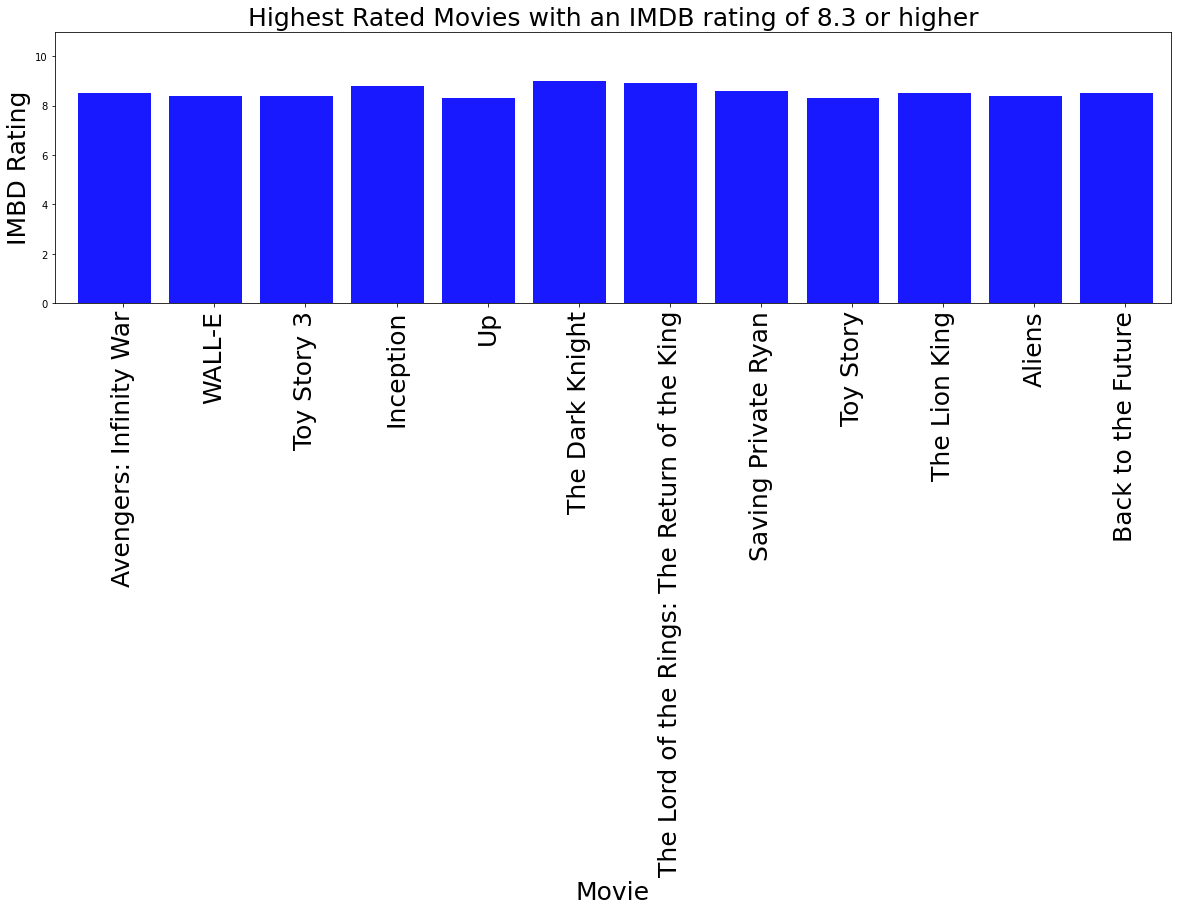

In [6]:
plt.figure(figsize=(20,5))
plt.bar(x_axishighrate, highestrated_df["IMDB Rating"], color='blue', alpha=0.9, align="edge")
plt.xticks(tick_locations, highestrated_df["Title"], rotation="90", fontsize=25)
plt.xlim(-0.25, len(x_axishighrate))
plt.ylim(0, max(highestrated_df["IMDB Rating"])+2)
plt.title("Highest Rated Movies with an IMDB rating of 8.3 or higher",fontsize=25)
plt.xlabel("Movie", fontsize=25)
plt.ylabel("IMBD Rating", fontsize=25)

# Identifiying the movies with the lowest IMDB ratings

In [7]:
lowestrated_df = allmovies_df.loc[allmovies_df["IMDB Rating"] <= 5.5, [
    "Title", "Production Budget", "IMDB Rating", "Year", "Studio", "Director"]]
lowestrated_df

,Title,Production Budget,IMDB Rating,Year,Studio,Director
50,The Smurfs,110000000.0,5.5,2011,Columbia Pictures,Raja Gosnell
56,The Twilight Saga: Eclipse,68000000.0,4.9,2010,Lionsgate Films,David Slade
67,The Twilight Saga: New Moon,50000000.0,4.6,2009,Lionsgate Films,Chris Weitz
129,Godzilla,160000000.0,5.3,1998,Sony Pictures,Roland Emmerich
144,The Nutty Professor,55000000.0,5.5,1996,Universal Pictures,Tom Shadyac
150,Batman Forever,100000000.0,5.4,1995,Warner Bros,Joel Schumacher
158,The Flintstones,45000000.0,4.8,1994,Universal Pictures,Brian Levant


In [8]:
lowbudavg = lowestrated_df["Production Budget"].mean()

print(f"The average budget of the movies with the lowest IMDB Ratings was {lowbudavg}")

The average budget of the movies with the lowest IMDB Ratings was 84000000.0


In [9]:
lowrateavg = lowestrated_df["IMDB Rating"].mean()

print(f"The average rating of the movies with the lowest IMDB Ratings was {lowrateavg}")

The average rating of the movies with the lowest IMDB Ratings was 5.142857142857143


In [10]:
x_axislowrate = np.arange(len(lowestrated_df))
tick_locations = [value+0.5 for value in x_axislowrate]

Text(0, 0.5, 'IMBD Rating')

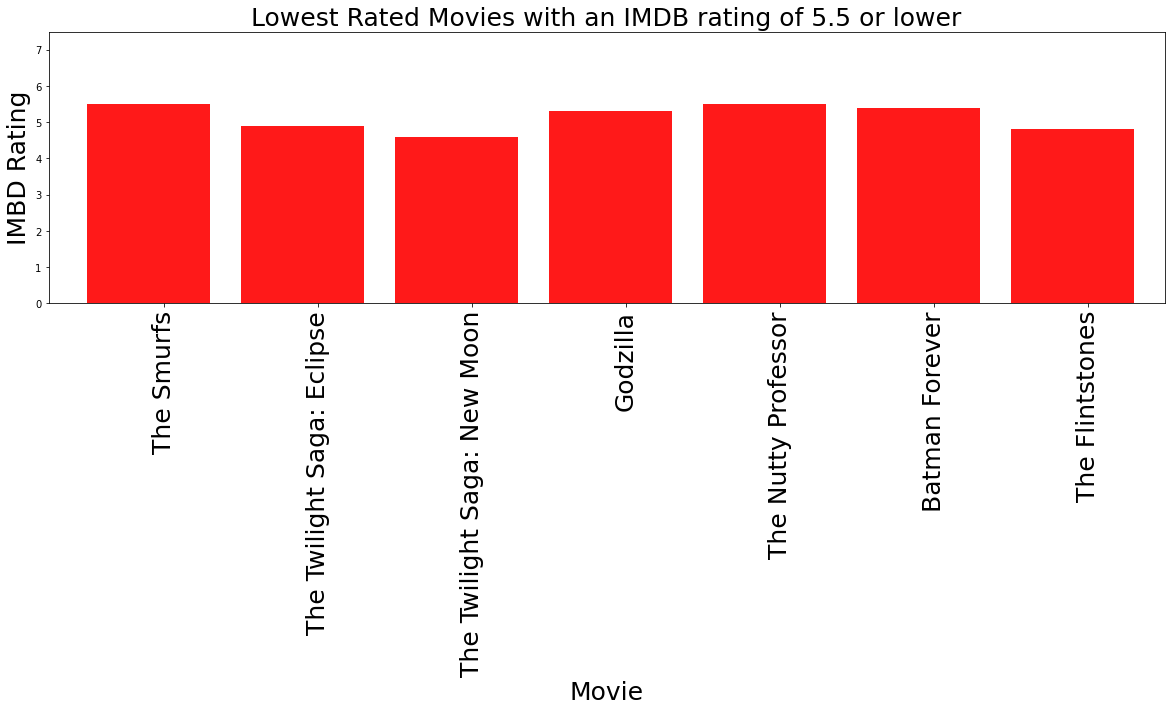

In [11]:
plt.figure(figsize=(20,5))
plt.bar(x_axislowrate, lowestrated_df["IMDB Rating"], color='red', alpha=0.9, align="edge")
plt.xticks(tick_locations, lowestrated_df["Title"], rotation="90", fontsize=25)
plt.xlim(-0.25, len(x_axislowrate))
plt.ylim(0, max(lowestrated_df["IMDB Rating"])+2)
plt.title("Lowest Rated Movies with an IMDB rating of 5.5 or lower",fontsize=25)
plt.xlabel("Movie", fontsize=25)
plt.ylabel("IMBD Rating", fontsize=25)

# Identifiying the movies with the highest Production Budgets

In [12]:
highestcost_df = allmovies_df.loc[allmovies_df["Production Budget"] >= 230000000, [
    "Title", "Production Budget", "IMDB Rating", "Year", "Studio", "Director"]]
highestcost_df

,Title,Production Budget,IMDB Rating,Year,Studio,Director
1,Avengers: Infinity War,300000000.0,8.5,2018,Walt Disney Pictures,"Anthony Russo, Joe Russo"
4,Solo: A Star Wars Story,275000000.0,7.0,2018,Walt Disney Pictures,Ron Howard
14,Justice League,300000000.0,6.5,2017,Warner Bros,Zack Snyder
16,Captain America: Civil War,250000000.0,7.8,2016,Walt Disney Pictures,"Anthony Russo, Joe Russo"
19,Batman v Superman: Dawn of Justice,263000000.0,6.5,2016,Warner Bros,Zack Snyder
22,Avengers: Age of Ultron,365000000.0,7.4,2015,Walt Disney Pictures,Joss Whedon
47,Pirates of the Caribbean: On Stranger Tides,379000000.0,6.7,2011,Walt Disney Pictures,Rob Marshall
58,Tangled,260000000.0,7.8,2010,Walt Disney Pictures,"Nathan Greno, Byron Howard"
61,Avatar,237000000.0,7.9,2009,20th Century Fox,James Cameron
62,Harry Potter and the Half-Blood Prince,250000000.0,7.5,2009,Warner Bros,David Yates


In [13]:
high_budavg = highestcost_df["Production Budget"].mean()

print(f"The average budget of the movies with production budgets of $230 million or higher was {high_budavg}")

The average budget of the movies with production budgets of $230 million or higher was 280916666.6666667


In [14]:
high_rateavg = highestcost_df["IMDB Rating"].mean()

print(f"The average rating of the movies with production budgets of $230 million or higher was {high_rateavg}")

The average rating of the movies with production budgets of $230 million or higher was 7.349999999999999


In [15]:
x_axishighbud = np.arange(len(highestcost_df))
tick_locations = [value+0.5 for value in x_axishighbud]

Text(0, 0.5, 'Production Cost')

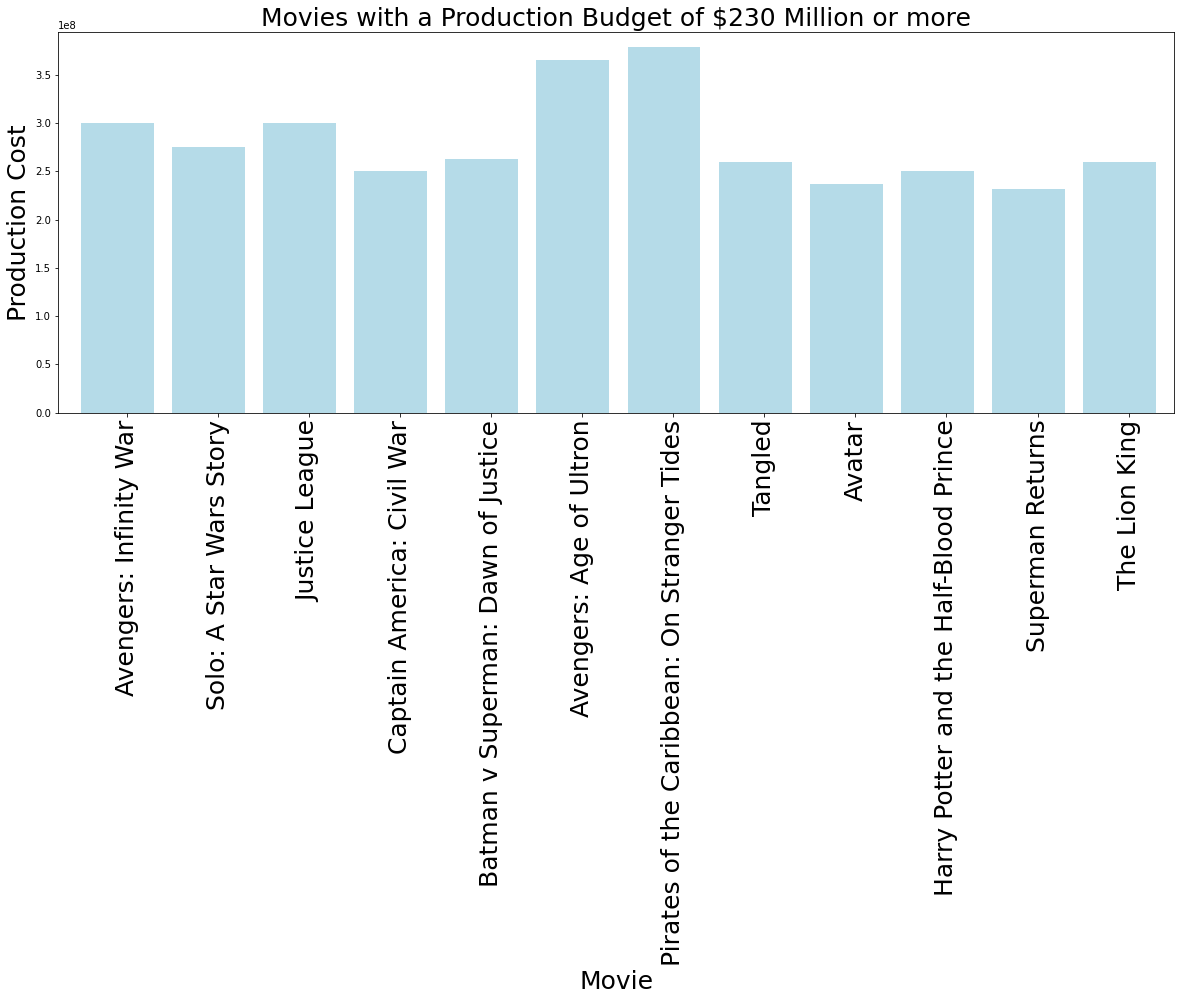

In [16]:
plt.figure(figsize=(20,7))
plt.bar(x_axishighbud, highestcost_df["Production Budget"], color='lightblue', alpha=0.9, align="edge")
plt.xticks(tick_locations, highestcost_df["Title"], rotation="90", fontsize=25)
plt.xlim(-0.25, len(x_axishighbud))
plt.ylim(0, max(highestcost_df["Production Budget"])+15000000)
plt.title("Movies with a Production Budget of $230 Million or more",fontsize=25)
plt.xlabel("Movie", fontsize=25)
plt.ylabel("Production Cost", fontsize=25)

# Identifiying the movies with the lowest Production Budgets

In [17]:
lowestcost_df = allmovies_df.loc[allmovies_df["Production Budget"] <= 12000000, [
    "Title", "Production Budget", "IMDB Rating", "Year", "Studio", "Director"]]
lowestcost_df

,Title,Production Budget,IMDB Rating,Year,Studio,Director
138,The Full Monty,3500000.0,7.2,1997,20th Century Fox,Peter Cattaneo
159,Four Weddings and a Funeral,4500000.0,7.1,1994,Universal Pictures,Mike Newell
191,The Golden Child,12000000.0,5.8,1986,Paramount Pictures,Michael Ritchie
194,Witness,12000000.0,7.5,1985,Paramount Pictures,Peter Weir
199,Flashdance,7000000.0,6.1,1983,Paramount Pictures,Adrian Lyne
201,E.T. the Extra-Terrestrial,10500000.0,7.9,1982,Universal Pictures,Steven Spielberg
202,Star Trek II: The Wrath of Khan,12000000.0,7.7,1982,Paramount Pictures,Nicholas Meyer
204,Chariots of Fire,5500000.0,7.2,1981,Warner Bros,Hugh Hudson
206,Time Bandits,12000000.0,7.0,1981,Embassy Pictures,Terry Gilliam
207,The Blue Lagoon,4500000.0,5.7,1980,Columbia Pictures,Randal Kleiser


In [18]:
low_budavg = lowestcost_df["Production Budget"].mean()

print(f"The average budget of the movies with production budgets of $12 million or lower was {low_budavg}")

The average budget of the movies with production budgets of $12 million or lower was 7730769.230769231


In [19]:
low_rateavg = lowestcost_df["IMDB Rating"].mean()

print(f"The average rating of the movies with production budgets of $12 million or lower was {low_rateavg}")

The average rating of the movies with production budgets of $12 million or lower was 7.084615384615384


In [20]:
x_axislowbud = np.arange(len(lowestcost_df))
tick_locations = [value+0.5 for value in x_axislowbud]

Text(0, 0.5, 'Production Cost')

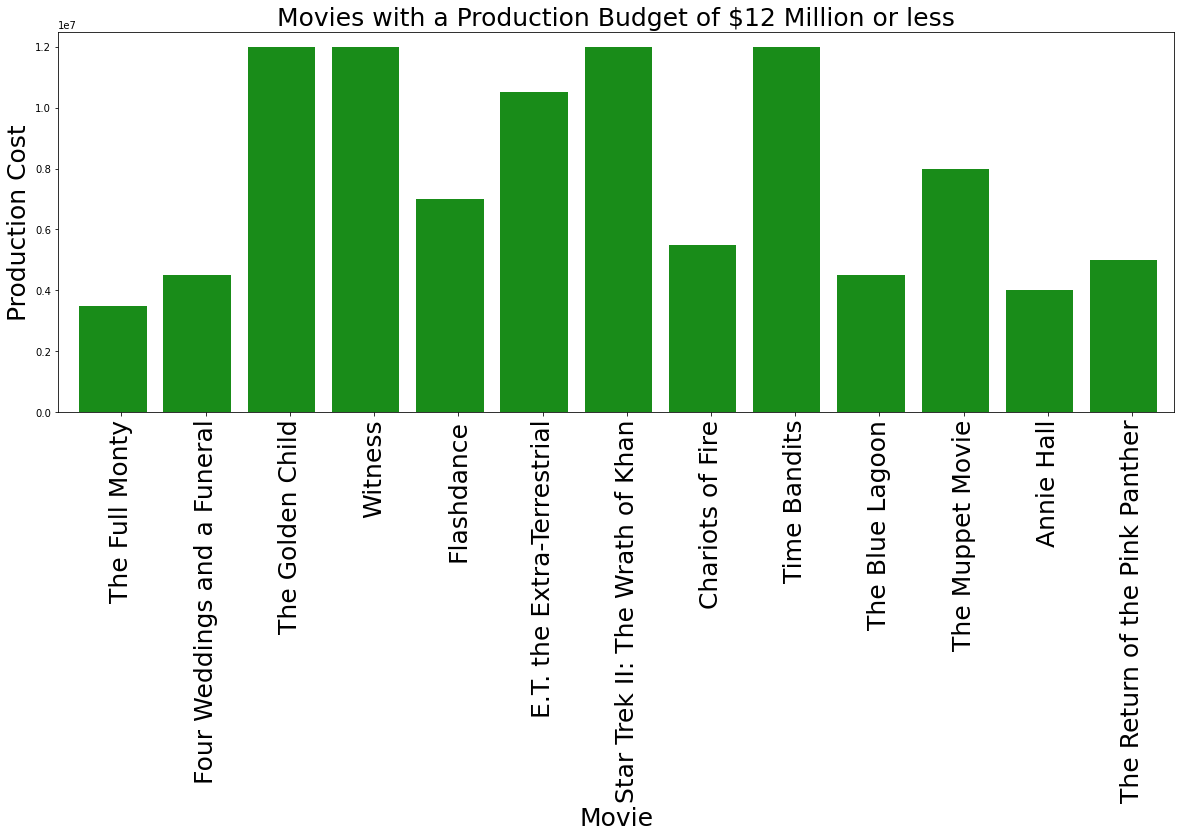

In [21]:
plt.figure(figsize=(20,7))
plt.bar(x_axislowbud, lowestcost_df["Production Budget"], color='green', alpha=0.9, align="edge")
plt.xticks(tick_locations, lowestcost_df["Title"], rotation="90", fontsize=25)
plt.xlim(-0.25, len(x_axislowbud))
plt.ylim(0, max(lowestcost_df["Production Budget"])+500000)
plt.title("Movies with a Production Budget of $12 Million or less",fontsize=25)
plt.xlabel("Movie", fontsize=25)
plt.ylabel("Production Cost", fontsize=25)

# Does the production budget of a film have a correlation with the ratings of a movie?

When reviewing the data, we initially wanted to identify the movies with the highest IMDB ratings and the ones with the lowest IMDB ratings and then compare how the budgets for each data set identified. Within the data compiled, there was 12 movies identified as having an IMDB rating of equal or greater than 8.3 and each movie had an average budget of roughly 140 million dollars. The highest rated movie per the data compiled was The Dark Knight which had a production budget of 185 million dollars and achieved a 9.0 IMDB rating. 

Conversely there was 7 movies identified as having an IMDB rating equal or less than 5.5 and each movie had an average budget of roughly 84 million dollars. The lowest rated movie per the data complied was The Twilight Saga: New Moon which had a production budget of 50 million dollars and achieved a 4.6 IMDB rating. 

We then wanted to identify the movies with the highest and lowest production budgets and then compare how their IMDB ratings were.  Within the data compiled, there was 12 movies identified as having a production budget of 230 million dollars or higher. Each movie had an average budget of roughly 281 million dollars and an average IMDB rating of 7.35. In terms of the lowest production budgets, there was 13 films identified as having a production budget of 12 million dollars or less. Each movie had an average budget of roughly 7.7 million dollars and an average IMDB rating of 7.08. 

Based upon the information compiled we can confirm that there is a correlation with the production budget of a film and their ratings. An interesting observation was the highest budget film, Pirates of the Carribbean: On Stranger Tides had a production budget of 379 million dollars and only obtained a 6.7 IMDB rating; however, the lowest production budget film of The Full Monty obtained a 7.2 IMDB rating with a production budget of only 3.5 million dollars. 
